# Semana Prática 1: Regressão Linear e Logística

Este notebook cobre exemplos práticos usando **pandas** + **scikit-learn**.

## 📘 Importações iniciais

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import load_diabetes, load_iris

## 🧩 Parte 1: Regressão Linear

In [2]:
# Dataset de exemplo: Diabetes (predição de progresso da doença)
data = load_diabetes()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_lin = LinearRegression()
model_lin.fit(X_train, y_train)
y_pred = model_lin.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²:", r2_score(y_test, y_pred))

MSE: 2900.1936284934814
RMSE: 53.85344583676593
R²: 0.4526027629719195


### Visualização simples

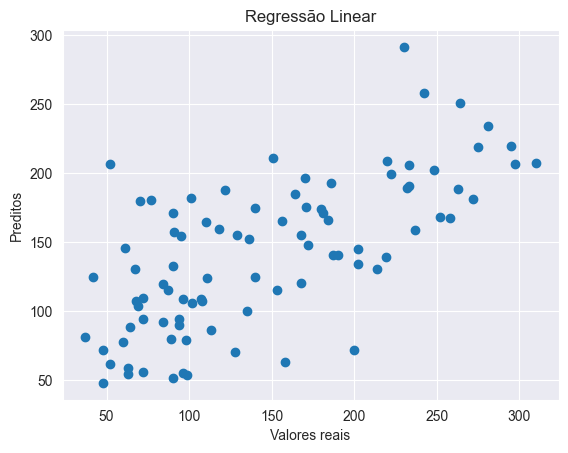

In [3]:
plt.scatter(y_test, y_pred)
plt.xlabel("Valores reais")
plt.ylabel("Preditos")
plt.title("Regressão Linear")
plt.show()

## 🧩 Parte 2: Regressão Logística

In [4]:
# Dataset de exemplo: Iris (classificação)
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target)

# Para simplificar, vamos transformar em problema binário (classe 0 vs classe 1)
X = X[y != 2]
y = y[y != 2]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_log = LogisticRegression()
model_log.fit(X_train, y_train)
y_pred = model_log.predict(X_test)

print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nRelatório de classificação:\n", classification_report(y_test, y_pred))
print("Matriz de confusão:\n", confusion_matrix(y_test, y_pred))

Acurácia: 1.0

Relatório de classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Matriz de confusão:
 [[12  0]
 [ 0  8]]


### Visualização da matriz de confusão

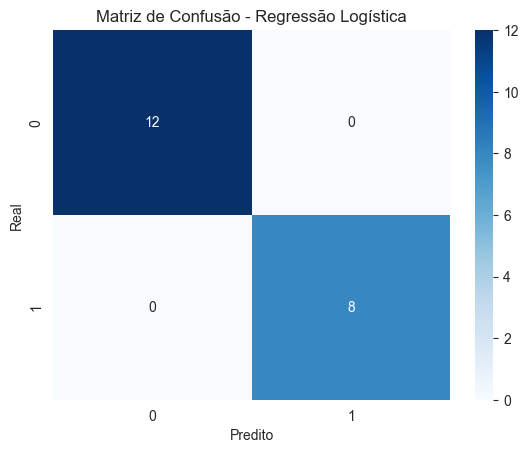

In [5]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Regressão Logística")
plt.show()